In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['average']=(df['math score']+df['reading score']+df['writing score'])/3

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [5]:
X=df.drop('average',axis=1)
y=df['average']

In [11]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='O' and feature!='average']
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [12]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [13]:
X=preprocessor.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    score=r2_score(true,predicted)
    return mae,rmse,score

In [23]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(verbose=False),
    'AdaBoost Regressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('________________________________________________')

    print('Model performance for test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
________________________________________________
Model performance for test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for training set
- Root Mean Squared Error: 1.0645
- Mean Absolute Error: 0.8506
- R2 Score: 0.9943
________________________________________________
Model performance for test set
- Root Mean Squared Error: 1.1142
- Mean Absolute Error: 0.8769
- R2 Score: 0.9942


Ridge
Model performance for training set
- Root Mean Squared Error: 0.0080
- Mean Absolute Error: 0.0065
- R2 Score: 1.0000
________________________________________________
Model performance for test set
- Root Mean Squared Error: 0.0088
- Mean Absolute Error: 0.0067
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for training set
- Root Mean Squared Error: 2.2573
- Mean Absolute Error: 1.7680


In [24]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
6,XGBRegressor,0.994748
1,Lasso,0.994209
5,Random Forest Regressor,0.993641
7,CatBoosting Regressor,0.993447
4,Decision Tree,0.987568
8,AdaBoost Regressor,0.979069
3,K-Neighbors Regressor,0.956016


In [26]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print('Accuracy in %:',score)

Accuracy in %: 100.0


Text(0, 0.5, 'Predicted')

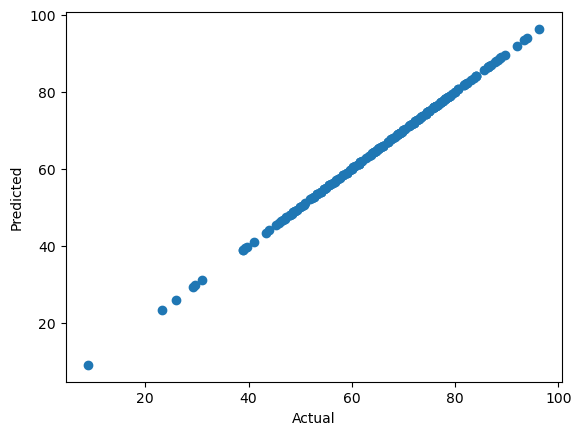

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='average'>

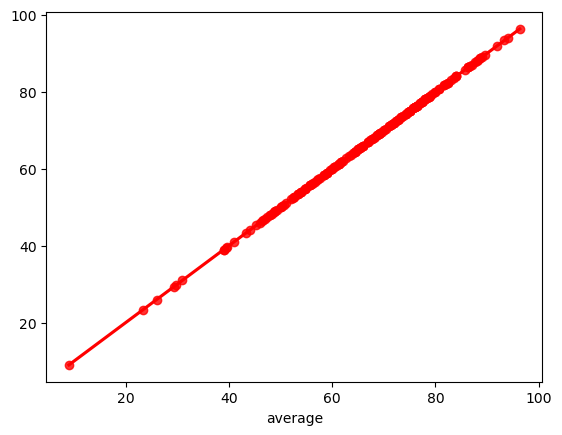

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')